# Importing Required Libaries:

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
)
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Read the Data

In [156]:
train_data=pd.read_csv(r"E:\Protfolio Projects\Machince Learning\A Comparative Study of Big Mart Sales Prediction\Dataset\train.csv")

In [157]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Description:

In [158]:
train_data.shape

(8523, 12)

In [159]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [160]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Define numerical and Categorical columns:

In [161]:
numerical_features=[feature for feature in train_data.columns if train_data[feature].dtype!="O"]
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtype=="O"]

print("we have {} numerical features :{}".format(len(numerical_features),numerical_features))
print("We have {} categorical features:{}".format(len(categorical_features),categorical_features))

we have 5 numerical features :['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
We have 7 categorical features:['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


# Data Transformation:

# Convert Categorical values into Numerical values 

In [162]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [163]:
Encoder=LabelEncoder()

train_data["Item_Identifier"]=Encoder.fit_transform(train_data["Item_Identifier"])
train_data["Item_Fat_Content"]=Encoder.fit_transform(train_data["Item_Fat_Content"])
train_data["Item_Type"]=Encoder.fit_transform(train_data["Item_Type"])
train_data["Outlet_Identifier"]=Encoder.fit_transform(train_data["Outlet_Identifier"])
train_data["Outlet_Size"]=Encoder.fit_transform(train_data["Outlet_Size"])
train_data["Outlet_Location_Type"]=Encoder.fit_transform(train_data["Outlet_Location_Type"])
train_data["Outlet_Type"]=Encoder.fit_transform(train_data["Outlet_Type"])

In [164]:
train_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228


# Check the Null values in the data:

In [165]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [166]:
Imputer=SimpleImputer(strategy="mean")

Imputed_data=Imputer.fit_transform(train_data)

In [167]:
Imputed_data

array([[1.5600000e+02, 9.3000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 3.7351380e+03],
       [8.0000000e+00, 5.9200000e+00, 2.0000000e+00, ..., 2.0000000e+00,
        2.0000000e+00, 4.4342280e+02],
       [6.6200000e+02, 1.7500000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 2.0972700e+03],
       ...,
       [1.3570000e+03, 1.0600000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1931136e+03],
       [6.8100000e+02, 7.2100000e+00, 2.0000000e+00, ..., 2.0000000e+00,
        2.0000000e+00, 1.8455976e+03],
       [5.0000000e+01, 1.4800000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 7.6567000e+02]])

In [168]:
train_data_df=pd.DataFrame(Imputed_data,columns=train_data.columns)

In [169]:
train_data_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0,1845.5976


In [170]:
train_data_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploring the Data:

# Coorelation between the Dependent and Independent Variables:

In [171]:
correlation=train_data_df.corr()

<AxesSubplot:>

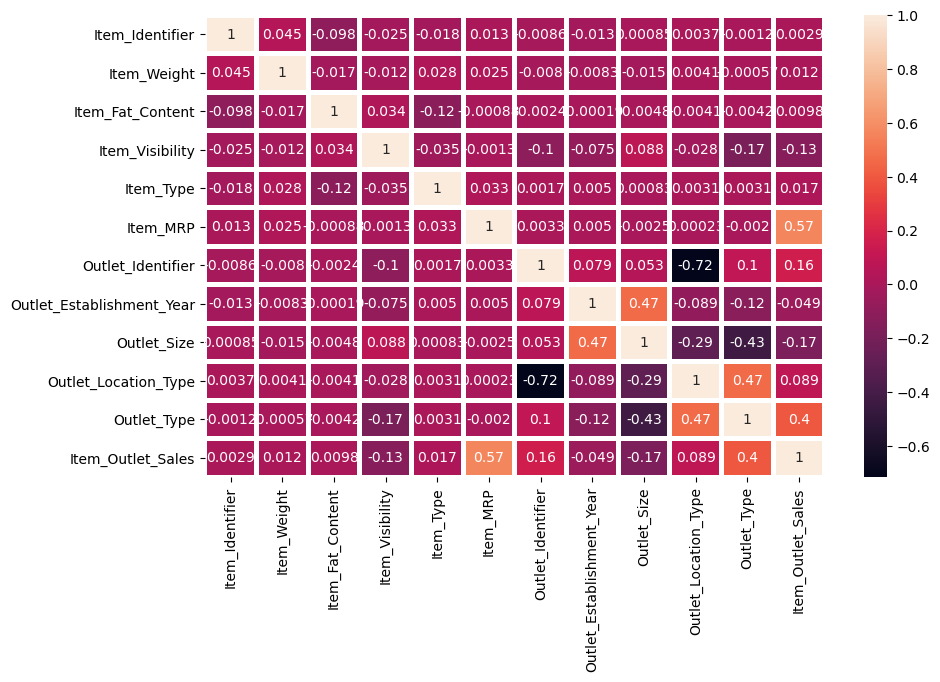

In [172]:
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(correlation,linewidth=3,annot=True)

# Data Visulization:

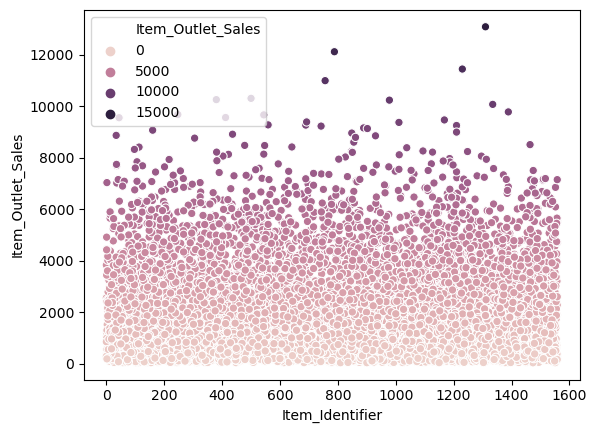

In [173]:
sns.scatterplot(data=train_data_df,x="Item_Identifier",y="Item_Outlet_Sales",hue="Item_Outlet_Sales")
plt.show()

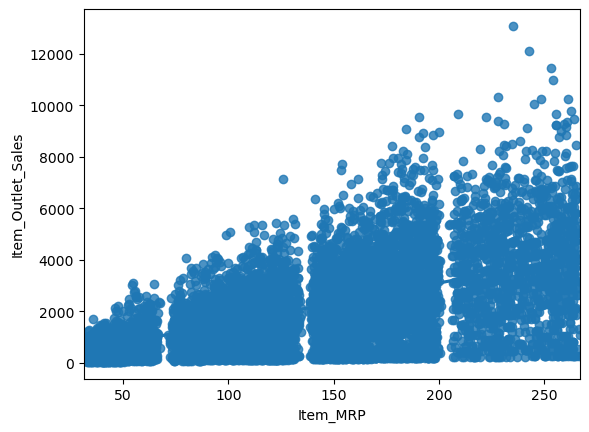

In [174]:
sns.regplot(data=train_data_df,x="Item_MRP",y="Item_Outlet_Sales")
plt.show()

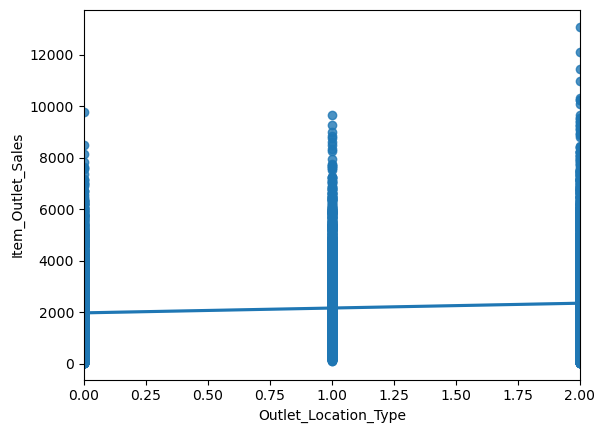

In [175]:
sns.regplot(data=train_data_df,x="Outlet_Location_Type",y="Item_Outlet_Sales")
plt.show()

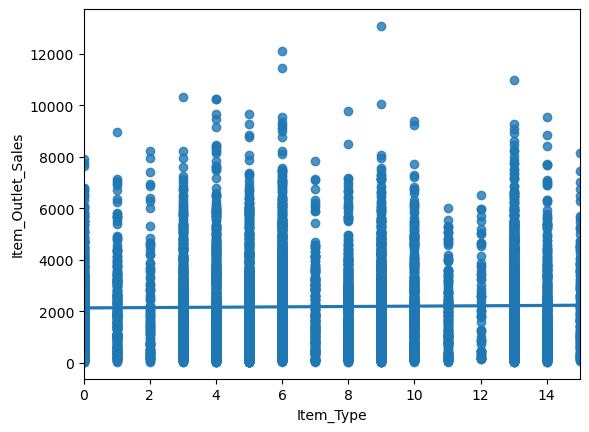

In [176]:
sns.regplot(data=train_data_df,x="Item_Type",y="Item_Outlet_Sales")
plt.show()

In [177]:
x=train_data_df.drop(["Item_Outlet_Sales"],axis=1)
y=train_data_df["Item_Outlet_Sales"]

In [178]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0


In [179]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Feature Selection:
# Using RFE Method

In [180]:
LR=LinearRegression()

rfe=RFE(LR,n_features_to_select=8)

rfe.fit(x,y)

selected_features=x.columns[rfe.support_]

print(selected_features)

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [181]:
X=train_data_df.drop(["Item_Weight","Item_Type","Item_Identifier","Item_Outlet_Sales"],axis=1)
X

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,0.016047,249.8092,9.0,1999.0,1.0,0.0,1.0
1,2.0,0.019278,48.2692,3.0,2009.0,1.0,2.0,2.0
2,1.0,0.016760,141.6180,9.0,1999.0,1.0,0.0,1.0
3,2.0,0.000000,182.0950,0.0,1998.0,3.0,2.0,0.0
4,1.0,0.000000,53.8614,1.0,1987.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...
8518,1.0,0.056783,214.5218,1.0,1987.0,0.0,2.0,1.0
8519,2.0,0.046982,108.1570,7.0,2002.0,3.0,1.0,1.0
8520,1.0,0.035186,85.1224,6.0,2004.0,2.0,1.0,1.0
8521,2.0,0.145221,103.1332,3.0,2009.0,1.0,2.0,2.0


# Model Training:

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [184]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 8)
(2557, 8)
(5966,)
(2557,)


In [191]:
def evaluate_model(true,predicted):
    MAE=mean_absolute_error(true,predicted)
    RMSE=np.sqrt(mean_squared_error(true,predicted))
    R2=r2_score(true,predicted)
    return MAE,RMSE,R2

In [195]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Make predictions:
    y_train_predicted=model.predict(X_train)
    y_test_predicted=model.predict(X_test)
    
    # Evaluate train and test dataset:
    model_train_RMSE,model_train_MAE,model_train_r2=evaluate_model(y_train,y_train_predicted)
    model_test_RMSE,model_test_MAE,model_test_r2=evaluate_model(y_test,y_test_predicted)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training Set")
    print("RMSE:{:.4f}".format(model_train_RMSE))
    print("MAE:{:.4f}".format(model_train_MAE))
    print("R2_score:{:.4f}".format(model_train_r2))
    
    print("----------------------------------------------------")
    
    print("Model performance for Testing Set")
    print("RMSE:{:.4f}".format(model_test_RMSE))
    print("MAE:{:.4f}".format(model_test_MAE))
    print("R2:{:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print("="*35)
    print("/n")

LinearRegression
Model performance for Training Set
RMSE:918.5318
MAE:1217.7290
R2_score:0.4986
----------------------------------------------------
Model performance for Testing Set
RMSE:875.7129
MAE:1173.1215
R2:0.5087
/n
DecisionTreeRegressor
Model performance for Training Set
RMSE:0.0000
MAE:0.0000
R2_score:1.0000
----------------------------------------------------
Model performance for Testing Set
RMSE:1029.1849
MAE:1483.2181
R2:0.2146
/n
RandomForestRegressor
Model performance for Training Set
RMSE:300.7238
MAE:433.5626
R2_score:0.9364
----------------------------------------------------
Model performance for Testing Set
RMSE:777.0954
MAE:1122.0297
R2:0.5505
/n
AdaBoostRegressor
Model performance for Training Set
RMSE:1013.3716
MAE:1255.0785
R2_score:0.4674
----------------------------------------------------
Model performance for Testing Set
RMSE:997.2573
MAE:1243.0842
R2:0.4483
/n
GradientBoostingRegressor
Model performance for Training Set
RMSE:731.4566
MAE:1032.7557
R2_score

# Results:

In [196]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model_name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model_name,R2_score
4,GradientBoostingRegressor,0.594474
2,RandomForestRegressor,0.550534
5,XGBRegressor,0.535855
0,LinearRegression,0.508669
3,AdaBoostRegressor,0.448318
1,DecisionTreeRegressor,0.214587


In [197]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

In [198]:
pred_data=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred,"Difference":y_test-y_pred})
pred_data

,Actual_value,Predicted_value,Difference
7503,1743.0644,849.533142,893.531258
2957,356.8688,772.421204,-415.552404
7031,377.5086,852.911499,-475.402899
1084,5778.4782,4506.409668,1272.068532
856,2356.9320,2490.472168,-133.540168
...,...,...,...
443,2133.2232,2175.902832,-42.679632
777,4287.7520,4281.748047,6.003953
1119,767.0016,446.713684,320.287916
3209,642.4970,1845.258545,-1202.761545
